In [1]:
import os

In [14]:
import numpy as np
import pandas as pd
import fitsio
from astropy.table import Table

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

sns.set(style='ticks', font_scale=1.5, palette='Set2')
%matplotlib inline

In [47]:
import skimage.io
import cv2

In [16]:
LSLGAdir = os.getenv('LSLGA_DIR')
parentfile = os.path.join(LSLGAdir, 'sample', 'large-galaxies-dr6-dr7.fits')

In [21]:
df = Table(fitsio.read(parentfile, ext=1)).to_pandas()

In [22]:
df.head()

,galaxy,pgc,objtype,ra,dec,type,bar,ring,multiple,compactness,...,w4sigm,tmass_key,j_m_2mass,j_msig_2mass,h_m_2mass,h_msig_2mass,k_m_2mass,k_msig_2mass,inwise,groupid
0,b'UGC12890',14,b'G',0.029208,8.279111,b'E',b'nan',b'nan',b'nan',b'nan',...,NaN,1179694535,13.887,0.082,13.542,0.149,13.111,0.118,True,0
1,b'PGC000012',12,b'G',0.035950,-6.373924,b'Sa',b'nan',b'nan',b'nan',b'nan',...,0.075,197326688,14.842,0.146,14.024,0.179,13.572,0.115,True,1
2,b'PGC000023',23,b'G',0.089541,-2.612028,b'E-S0',b'nan',b'nan',b'nan',b'nan',...,NaN,563745025,14.244,0.092,13.373,0.109,13.047,0.075,True,2
3,b'UGC12913',124,b'G',0.402852,3.505577,b'Sc',b'nan',b'nan',b'nan',b'nan',...,0.000,0,0.000,0.000,0.000,0.000,0.000,0.000,False,13
4,b'PGC000176',176,b'G',0.645120,-3.710767,b'Sbc',b'B',b'nan',b'nan',b'nan',...,0.020,1319888003,13.753,NaN,13.324,0.067,12.581,NaN,True,17


In [31]:
subset = df[df.groupid == 2238]

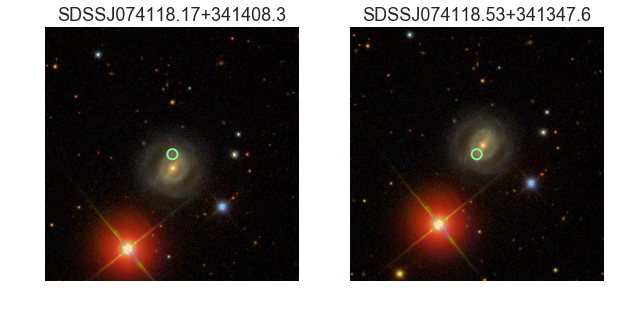

In [96]:
width = 500
height = 500
pixelsize = 0.396
plt.figure(figsize=(len(subset)*5, len(subset)*3))
subPlotNum = 1


for index,gal in subset.iterrows():

    # the 'scale' parameter is set so that the image will be about 2x the size of the galaxy
    scale=80*gal['d25']/pixelsize/width
    url="http://skyservice.pha.jhu.edu/DR14/ImgCutout/getjpeg.aspx?ra="+str(gal['ra'])
    url+="&dec="+str(gal['dec'])+"&scale="""+str(scale)+"&width="+str(width)
    url+="&height="+str(height)
    img=skimage.io.imread(url)
    
    ax = plt.subplot(1,2,subPlotNum)
    
    subPlotNum += 1  
    plt.axis('off')
    plt.imshow(img)
    
    circ = Circle((250, 250), 10, facecolor='none', edgecolor='lightgreen', linewidth=2)
    ax.add_patch(circ)
    
    # show the object identifier (objId) above the image.
    plt.title(gal.galaxy.decode('utf-8'))

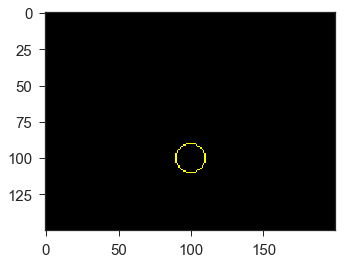

In [73]:
height, width = 150, 200
img = np.zeros((height, width, 3), np.uint8)
cv2.circle(img, (100, 100), 10, (255,255,0), thickness=1, lineType=0, shift=0)
plt.imshow(img)